# Data Prepocessing
1. Import data
2. Eksplorasi data

## 1. Import Data

In [1]:
import pandas as pd
import numpy as np

### Data features

In [2]:
#import seluruh file features
df1 = pd.read_csv('D:/DATA SCIENTIST/DS-GRAB COMPETITION/safety/features/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv') 
df2 = pd.read_csv('D:/DATA SCIENTIST/DS-GRAB COMPETITION/safety/features/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv') 
df3 = pd.read_csv('D:/DATA SCIENTIST/DS-GRAB COMPETITION/safety/features/part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv') 
df4 = pd.read_csv('D:/DATA SCIENTIST/DS-GRAB COMPETITION/safety/features/part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv') 
df5 = pd.read_csv('D:/DATA SCIENTIST/DS-GRAB COMPETITION/safety/features/part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv') 
df6 = pd.read_csv('D:/DATA SCIENTIST/DS-GRAB COMPETITION/safety/features/part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv') 
df7 = pd.read_csv('D:/DATA SCIENTIST/DS-GRAB COMPETITION/safety/features/part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv') 
df8 = pd.read_csv('D:/DATA SCIENTIST/DS-GRAB COMPETITION/safety/features/part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv') 
df9 = pd.read_csv('D:/DATA SCIENTIST/DS-GRAB COMPETITION/safety/features/part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv') 
df10 = pd.read_csv('D:/DATA SCIENTIST/DS-GRAB COMPETITION/safety/features/part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv') 

In [3]:
#menggabung semua file features
df = df1.append([df2, df3, df4, df5, df6, df7, df8, df9, df10])

In [4]:
df.head()

,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,1202590843006,3.000,353.0,1.228867,8.900100,3.986968,0.008221,0.002269,-0.009966,1362.0,0.000000
1,274877907034,9.293,17.0,0.032775,8.659933,4.737300,0.024629,0.004028,-0.010858,257.0,0.190000
2,884763263056,3.000,189.0,1.139675,9.545974,1.951334,-0.006899,-0.015080,0.001122,973.0,0.667059
3,1073741824054,3.900,126.0,3.871543,10.386364,-0.136474,0.001344,-0.339601,-0.017956,902.0,7.913285
4,1056561954943,3.900,50.0,-0.112882,10.550960,-1.560110,0.130568,-0.061697,0.161530,820.0,20.419409


In [5]:
df.count()

bookingID         16135561
Accuracy          16135561
Bearing           16135561
acceleration_x    16135561
acceleration_y    16135561
acceleration_z    16135561
gyro_x            16135561
gyro_y            16135561
gyro_z            16135561
second            16135561
Speed             16135561
dtype: int64

In [6]:
#agregate menjadi rataan
df_rata=df.groupby('bookingID').mean()

In [7]:
df_med=df.groupby('bookingID').median()

In [9]:
df_freq=df.groupby('bookingID').count()

In [10]:
df_freq.head()

,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
bookingID,,,,,,,,,,
0,1004,1004,1004,1004,1004,1004,1004,1004,1004,1004
1,851,851,851,851,851,851,851,851,851,851
2,195,195,195,195,195,195,195,195,195,195
4,1094,1094,1094,1094,1094,1094,1094,1094,1094,1094
6,1095,1095,1095,1095,1095,1095,1095,1095,1095,1095


In [8]:
df_med.to_csv(r'D:\DATA SCIENTIST\DS-GRAB COMPETITION\safety\df_median.csv')

In [11]:
df_freq.to_csv(r'D:\DATA SCIENTIST\DS-GRAB COMPETITION\safety\df_freq.csv')

### Data label

In [16]:
#import y
df_y = pd.read_csv('D:/DATA SCIENTIST/DS-GRAB COMPETITION/safety/labels/part-00000-e9445087-aa0a-433b-a7f6-7f4c19d78ad6-c000.csv') 


In [17]:
df_y.count()

bookingID    20018
label        20018
dtype: int64

In [18]:
ab=df_y.groupby('bookingID').sum()

In [19]:
ab[ab['label']>1].count()
#artinya ada 9 bookingID dengan 50% kemungkinan berbahaya dan 50% tidak berbahaya

label    0
dtype: int64

In [20]:
df_y = df_y.sort_values('label', ascending=False)
df_y = df_y.drop_duplicates(subset='bookingID', keep='first')
df_y.count()
#dari 2 booking ID yg double diambil yg pertama (label==1)

bookingID    20000
label        20000
dtype: int64

### Data gabungan features dan label

In [34]:
#gabung data X dan Y
data_gabung=pd.merge(df_y, df_rata, on='bookingID')
data_gabung.head()

,bookingID,label,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,558345748643,1,10.000000,248.598367,0.158623,-8.011419,-5.158946,-0.039370,0.058678,0.002741,250.887892,6.016906
1,1675037245579,1,13.030179,181.696203,-0.217563,8.935200,-3.094331,0.003644,-0.021885,0.005759,344.694093,5.849705
2,738734375002,1,10.233333,159.801429,0.017302,-9.722970,0.557977,-0.006881,0.006287,0.020431,599.500000,16.898142
3,1382979469351,1,6.118642,124.425373,0.509663,8.640243,4.469174,0.002032,0.003108,0.001909,464.728358,4.190761
4,876173328519,1,4.188669,122.893750,0.212095,9.829450,1.347213,0.003678,-0.000037,-0.002254,97.487500,9.329062


In [35]:
data_gabung2=pd.merge(data_gabung, df_med, on='bookingID')
data_gabung2.head()

,bookingID,label,Accuracy_x,Bearing_x,acceleration_x_x,acceleration_y_x,acceleration_z_x,gyro_x_x,gyro_y_x,gyro_z_x,...,Accuracy_y,Bearing_y,acceleration_x_y,acceleration_y_y,acceleration_z_y,gyro_x_y,gyro_y_y,gyro_z_y,second_y,Speed_y
0,558345748643,1,10.000000,248.598367,0.158623,-8.011419,-5.158946,-0.039370,0.058678,0.002741,...,10.000,261.453888,0.155966,-7.998837,-5.154361,-0.039348,0.045646,-0.008206,115.0,5.450000
1,1675037245579,1,13.030179,181.696203,-0.217563,8.935200,-3.094331,0.003644,-0.021885,0.005759,...,13.653,180.500000,-0.267281,8.931763,-3.203140,0.002373,-0.005867,0.001785,344.5,5.695000
2,738734375002,1,10.233333,159.801429,0.017302,-9.722970,0.557977,-0.006881,0.006287,0.020431,...,10.000,114.817375,0.019066,-9.755887,0.545956,-0.006942,0.004188,0.019859,599.5,17.309999
3,1382979469351,1,6.118642,124.425373,0.509663,8.640243,4.469174,0.002032,0.003108,0.001909,...,6.000,89.000000,0.492569,8.653839,4.503258,0.000366,-0.000610,0.000320,395.0,1.610000
4,876173328519,1,4.188669,122.893750,0.212095,9.829450,1.347213,0.003678,-0.000037,-0.002254,...,3.900,84.500000,0.269600,9.843765,1.273323,0.004791,0.002701,-0.003105,97.5,11.080000


In [36]:
data_gabung3=pd.merge(data_gabung2, df_freq, on='bookingID')
data_gabung3.head()

,bookingID,label,Accuracy_x,Bearing_x,acceleration_x_x,acceleration_y_x,acceleration_z_x,gyro_x_x,gyro_y_x,gyro_z_x,...,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,558345748643,1,10.000000,248.598367,0.158623,-8.011419,-5.158946,-0.039370,0.058678,0.002741,...,223,223,223,223,223,223,223,223,223,223
1,1675037245579,1,13.030179,181.696203,-0.217563,8.935200,-3.094331,0.003644,-0.021885,0.005759,...,474,474,474,474,474,474,474,474,474,474
2,738734375002,1,10.233333,159.801429,0.017302,-9.722970,0.557977,-0.006881,0.006287,0.020431,...,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200
3,1382979469351,1,6.118642,124.425373,0.509663,8.640243,4.469174,0.002032,0.003108,0.001909,...,670,670,670,670,670,670,670,670,670,670
4,876173328519,1,4.188669,122.893750,0.212095,9.829450,1.347213,0.003678,-0.000037,-0.002254,...,160,160,160,160,160,160,160,160,160,160


### Export data gabung

In [37]:
data_gabung3.to_csv(r'D:\DATA SCIENTIST\DS-GRAB COMPETITION\safety\df_gabung3.csv')

### Import data gabung

In [8]:
#import y
data_gabung = pd.read_csv('D:\DATA SCIENTIST\DS-GRAB COMPETITION\safety\df_gabung3.csv') 
data_gabung.head()


,Unnamed: 0,bookingID,label,Accuracy_x,Bearing_x,acceleration_x_x,acceleration_y_x,acceleration_z_x,gyro_x_x,gyro_y_x,...,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,0,558345748643,1,10.000000,248.598367,0.158623,-8.011419,-5.158946,-0.039370,0.058678,...,223,223,223,223,223,223,223,223,223,223
1,1,1675037245579,1,13.030179,181.696203,-0.217563,8.935200,-3.094331,0.003644,-0.021885,...,474,474,474,474,474,474,474,474,474,474
2,2,738734375002,1,10.233333,159.801429,0.017302,-9.722970,0.557977,-0.006881,0.006287,...,1200,1200,1200,1200,1200,1200,1200,1200,1200,1200
3,3,1382979469351,1,6.118642,124.425373,0.509663,8.640243,4.469174,0.002032,0.003108,...,670,670,670,670,670,670,670,670,670,670
4,4,876173328519,1,4.188669,122.893750,0.212095,9.829450,1.347213,0.003678,-0.000037,...,160,160,160,160,160,160,160,160,160,160


In [9]:
print("Dimensi data :\n",data_gabung.shape,"\n")
print("Tipe Data :\n",data_gabung.dtypes,"\n")
print("Data Hilang :\n",data_gabung.isnull().sum(),"\n")

Dimensi data :
 (20000, 33) 

Tipe Data :
 Unnamed: 0            int64
bookingID             int64
label                 int64
Accuracy_x          float64
Bearing_x           float64
acceleration_x_x    float64
acceleration_y_x    float64
acceleration_z_x    float64
gyro_x_x            float64
gyro_y_x            float64
gyro_z_x            float64
second_x            float64
Speed_x             float64
Accuracy_y          float64
Bearing_y           float64
acceleration_x_y    float64
acceleration_y_y    float64
acceleration_z_y    float64
gyro_x_y            float64
gyro_y_y            float64
gyro_z_y            float64
second_y            float64
Speed_y             float64
Accuracy              int64
Bearing               int64
acceleration_x        int64
acceleration_y        int64
acceleration_z        int64
gyro_x                int64
gyro_y                int64
gyro_z                int64
second                int64
Speed                 int64
dtype: object 

Data Hilang :
 Un

## 2. Eksplorasi data 

### Peubah respon

In [10]:
# library untuk eksplorasi data
import matplotlib.pyplot as plt

# library seaborn
import seaborn as sns

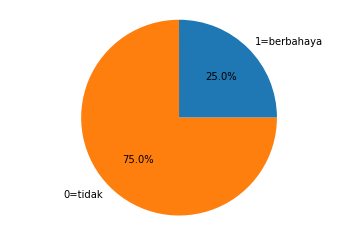

In [11]:
# menghitung ukuran diagram pie
size = [sum(data_gabung['label']),len(data_gabung['label'])-sum(data_gabung['label'])]

# menentukan label
label = ['1=berbahaya','0=tidak']

# diagram pie
plt.pie(size,labels=label, autopct = '%1.1f%%')

# merubah ukuran huruf pada grafik
sns.set_context("paper", font_scale=2)

plt.axis('equal')
plt.show()

### Peubah penjelas

In [14]:
# fitur numerik (float64)
FITUR_FLOAT=list(data_gabung.columns[data_gabung.dtypes=='float64'])
FITUR_FLOAT

['Accuracy_x',
 'Bearing_x',
 'acceleration_x_x',
 'acceleration_y_x',
 'acceleration_z_x',
 'gyro_x_x',
 'gyro_y_x',
 'gyro_z_x',
 'second_x',
 'Speed_x',
 'Accuracy_y',
 'Bearing_y',
 'acceleration_x_y',
 'acceleration_y_y',
 'acceleration_z_y',
 'gyro_x_y',
 'gyro_y_y',
 'gyro_z_y',
 'second_y',
 'Speed_y']

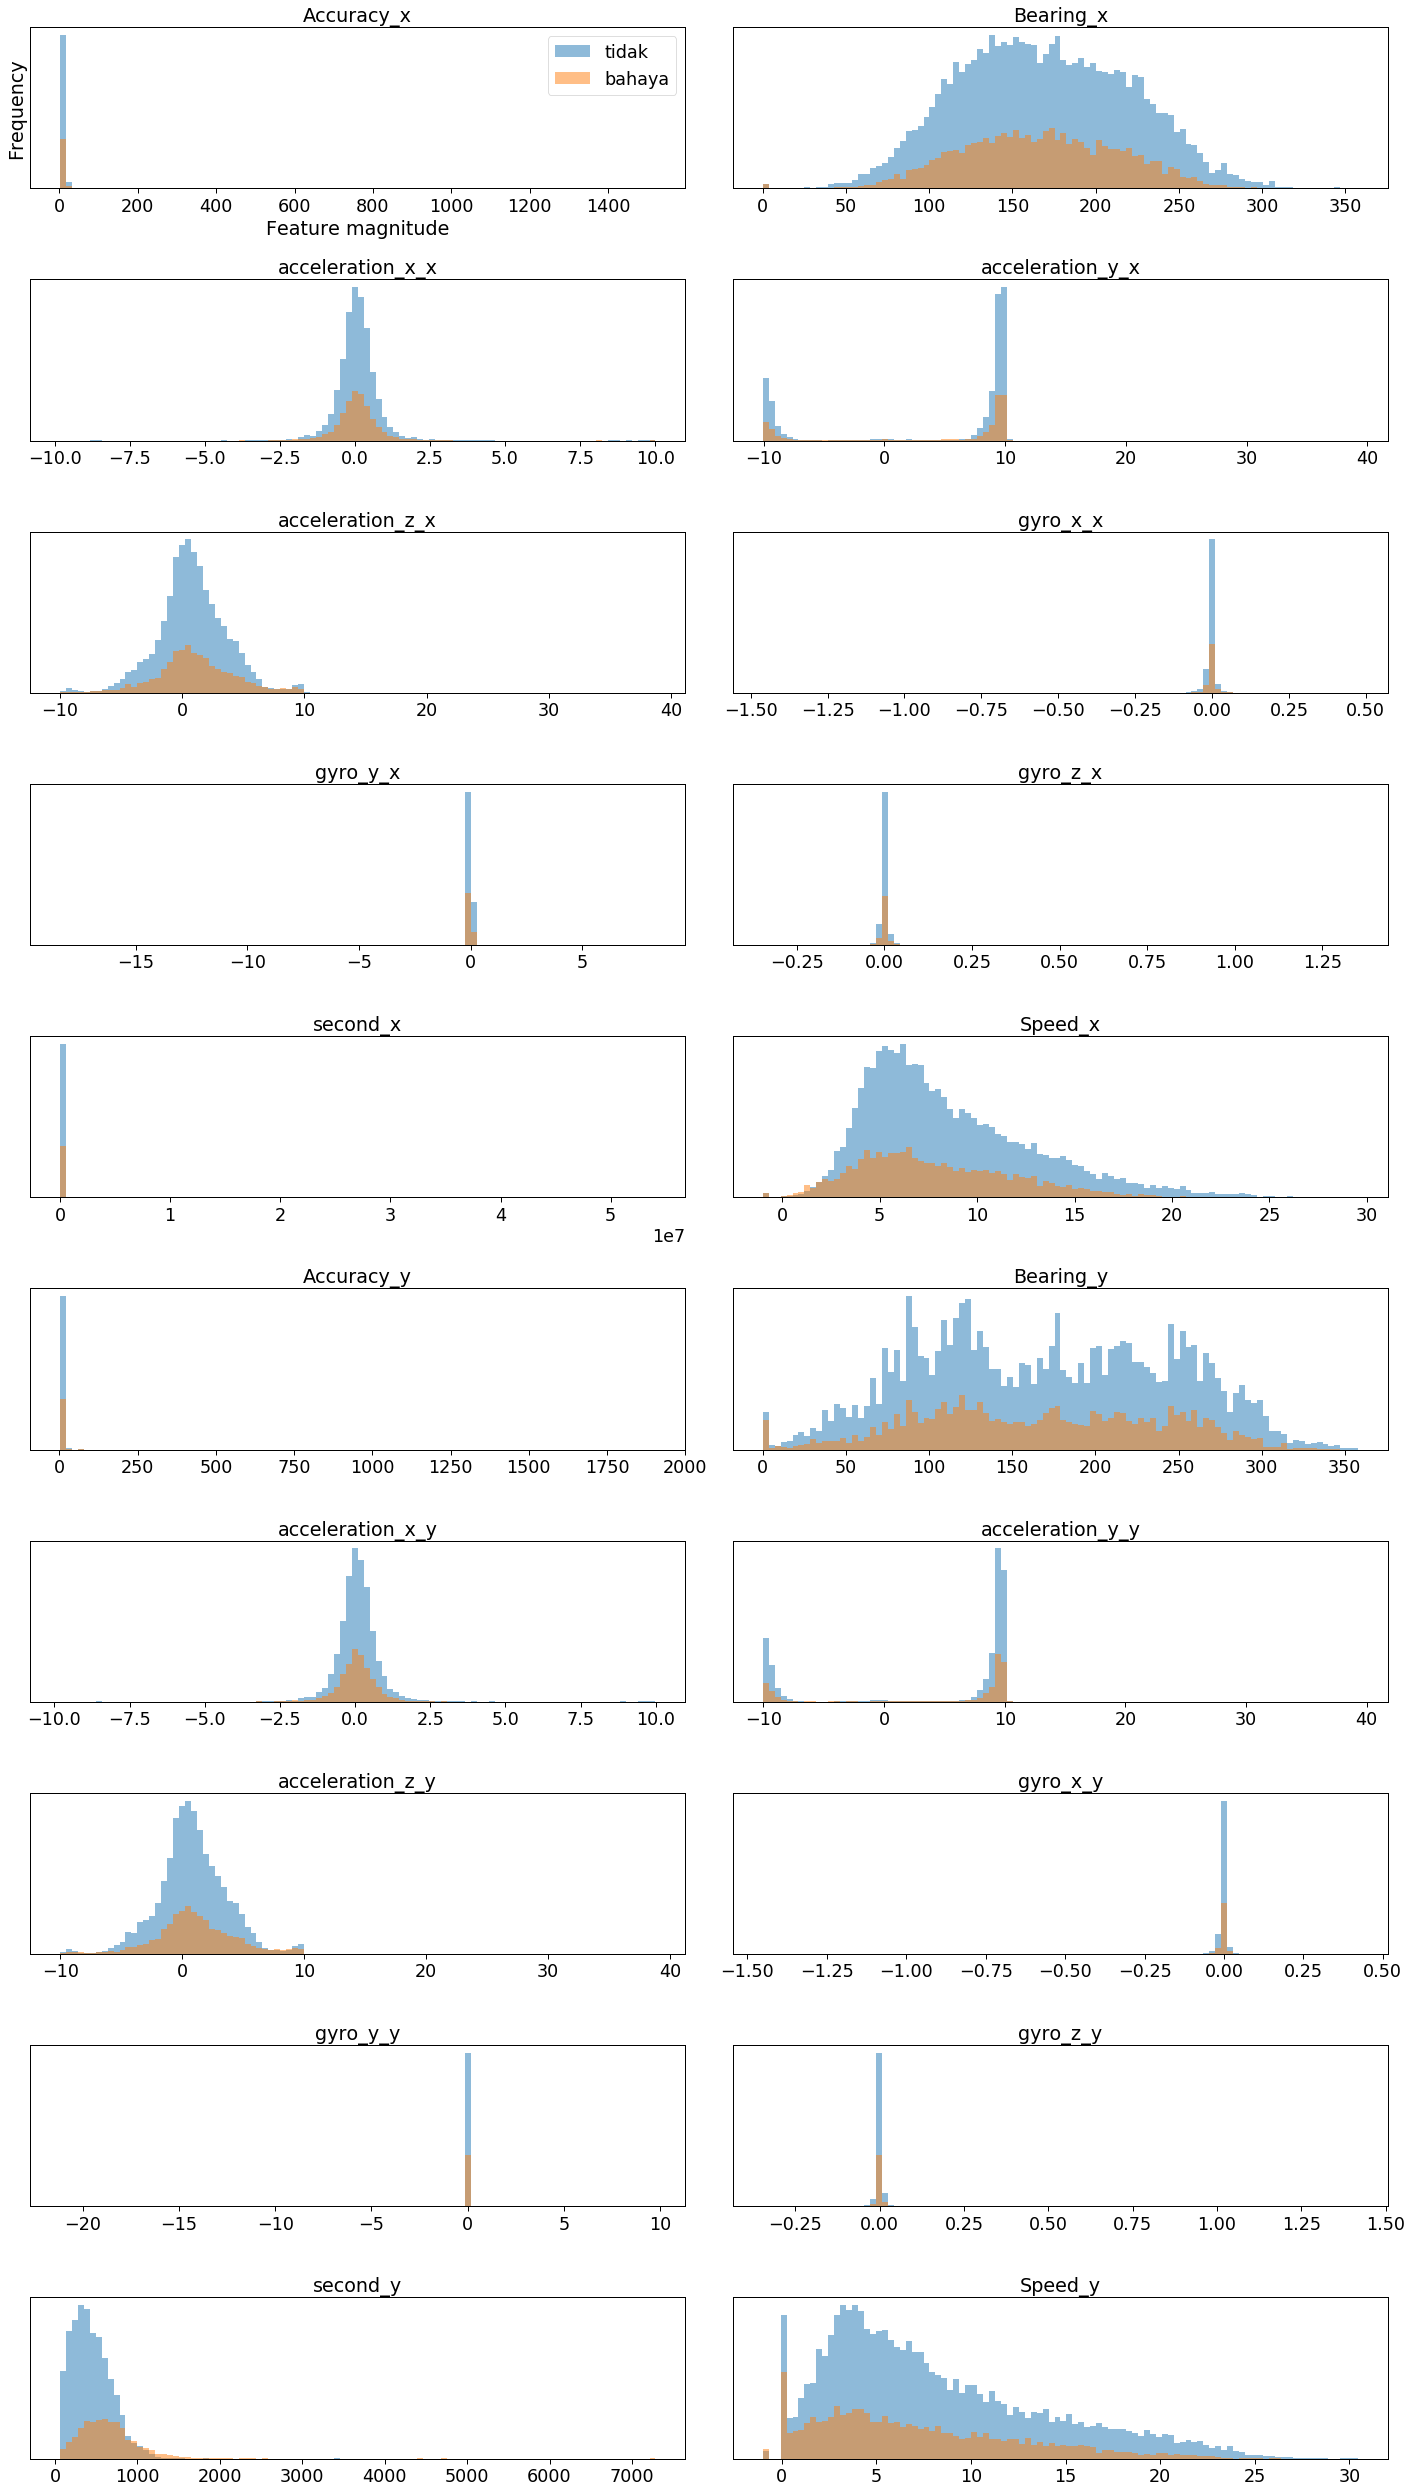

In [15]:
# membuat stacked histogram dengan looping

# menyediakan jenedla dengan ukuran tertentu
fig, axes = plt.subplots(10,2, figsize = (20,35))

# memisahkan data untuk masing masing kategori pada peubah respon
bahaya = data_gabung[data_gabung['label']==1]
tidak = data_gabung[data_gabung['label']==0]

# mengubah orientasi penomoran pada jendela
ax = axes.ravel()

# pembuatan gambar menggunakan looping
for i,fitur in zip(range(0,22),FITUR_FLOAT):
    
    # banyaknya kelas pada histogram
    _, bins = np.histogram(data_gabung[fitur],bins=100)
    
    # membuat histogram kategori lancar
    ax[i].hist(tidak[fitur], bins=bins,  alpha=.5)   
    
    # membuat histogram kategori macet
    ax[i].hist(bahaya[fitur], bins=bins, alpha=.5)   
    
    # menambahkan judul
    ax[i].set_title(fitur)    
    
    # manambahakn keterangan pada sumbu x
    ax[i].set_yticks(()) 
    
ax[0].set_xlabel("Feature magnitude") 
ax[0].set_ylabel("Frequency") 
ax[0].legend(["tidak", "bahaya"], loc="best") 
fig.tight_layout()
plt.show()